# Political Forecasting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from celluloid import Camera

In [ ]:
!pip install celluloid

In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

# New Section

In [ ]:
df = pd.read_table('data.csv', delimiter=';')
da = df.sort_values(by=['time'])

In [ ]:
da.head()

,Unnamed: 0,id_tweet,isFavorable,id_politico,text,time,nome_principal,twitter,classe politica,nome_partido,estado,regiao
212,212,2972,1,206,RT @PSDBnaCamara: A Dep @geovaniadesa chama at...,2019-01-01 17:36:46,GEOVANIA DE SÁ,geovaniadesa,deputado federal,PSDB,SANTA CATARINA,SUL
979,979,19996,1,281,Guedes: Reforma da Previdência é o maior desaf...,2019-01-02 18:23:13,JÚLIO CESAR,depjuliocesarpi,deputado federal,PSD,PIAUÍ,NORDESTE
167,167,2301,1,154,Eduardo Costa em entrevista à TV Câmara.\n\nCo...,2019-01-04 14:09:04,EDUARDO COSTA,dep_eduardo,deputado federal,PTB,para,NORTE
431,431,5779,0,399,No texto proposto para a reforma da Previdênci...,2019-01-10 17:15:14,PAULO PEREIRA DA SILVA,dep_paulinho,deputado federal,SD,SÃO PAULO,SUDESTE
430,430,5777,-1,399,@bnpaes Estou na luta para que a reforma da Pr...,2019-01-11 14:00:51,PAULO PEREIRA DA SILVA,dep_paulinho,deputado federal,SD,SÃO PAULO,SUDESTE


In [ ]:
np.unique(da.time)

array(['2019-01-01 17:36:46', '2019-01-02 18:23:13',
       '2019-01-04 14:09:04', ..., '2019-07-11 15:29:21',
       '2019-07-11 15:30:10', '2019-07-11 15:30:16'], dtype=object)

In [ ]:
np.random.seed(19680801)

class SimulateStatement:
  def __init__(self, N, maxtweets):
    self.N = N
    self.maxtweets = maxtweets


  def np_continuous(self):
      statements = np.zeros((self.N,self.maxtweets))
      for i in range(0,self.N):
          statements[i] =  np.random.uniform(-1,1,self.maxtweets)
      return statements

  def np_binary(self):
      statements = np.zeros((self.N,self.maxtweets))
      for i in range(0,self.N):
          #statements[i] =  np.random.uniform(-1,1,T)
          statements[i] = np.random.randint(0,2,self.maxtweets)
          statements[i][np.where(statements[i]==0)]=-1
      return statements

  def list_continuous(self):
      statements = []
      for i in range(0,self.N):
          maxt = np.random.randint(0,self.maxtweets)
          statementsi =  np.random.uniform(-1,1,maxt)
          statements.append(statementsi)
      return statements

  def list_binary(self):
      statements = []
      for i in range(0,self.N):
          maxt = np.random.randint(0,self.maxtweets)
          statementsi =  np.random.randint(0,2,maxt)
          statementsi[np.where(statementsi==0)]=-1
          statements.append(statementsi)
      return statements

K - Undiceded 
$$$$
$\Lambda$ - in favour
$$$$
$\Omega$ - Against

In [ ]:
# da pra deixar todos os run_model como apenas 1 funcao, usando o exp ou mean como o parametro
# podecre, acho que a boa é inserir como metodos dentro da classe

# Trajectory Score Vector on Time
class Model: 
  def __init__(self, tau, l, delta):
    self.N = N
    self.maxtweets = maxtweets

  def h_exp(tau , l):
      
      h = np.zeros(len(tau))
      h[0] = tau[0]
      
      for i in range(0,len(tau)):
          h[i] = l*h[i-1] + (1-l)*tau[i]
      return h

  # End result Score

  def h_exp_escalar(tau , l):
      
      h = 0
      h = tau[0]
      
      for i in range(0,len(tau)):
          h = l*h + (1-l)*tau[i]
      
      return h

  # Score as mean of posts

  def h_mean(tau ):
      return np.mean(tau)


  def run_model_exp_def(statements, delta, l): # t é n de enesimo tweet
      
      N = np.shape(statements)[0]
      P = np.zeros(N)
      
      for i in range(0,N):
          
          tau = statements[i]
          h = h_exp_escalar(tau, l)
          
          if(abs(h)> delta):
              if(h>0):
                  P[i] = 1
              elif(h<0):
                  P[i] = -1
          elif(abs(h)< delta):
              P[i] = 0
            
      return P

  def run_model_mean(statements, delta, l): # t é n de enesimo tweet
      
      N = np.shape(statements)[0]
      P = np.zeros(N)
      
      for i in range(0,N):
          
          tau = statements[i]
          h = h_mean(tau)
          
          if(abs(h)> delta):
              if(h>0):
                  P[i] = 1
              elif(h<0):
                  P[i] = -1
          elif(abs(h)< delta):
              P[i] = 0
            
      return P

  def study_hexp(statements, delta, l): # t é n de enesimo tweet
      
      N = np.shape(statements)[0]
      P = np.zeros(N)
      
      hexp=[]

      for i in range(0,N):
          
          tau = statements[i]
          h = h_exp_escalar(tau, l)
          hexp.append(h)
            
      return hexp

We define the fluxes as the number of politicians that change from one set to another, example, the flux $\phi_{K,\Omega}$ would be the total number of politicians migrating from being undecided on the subject at hand (set K)  to being against it (set $\Omega$).

Note that  $\phi_{K,\Omega} + \phi_{\Omega,K} = 0$

We also define the changes within the sets 

$\Delta_t = (|K_t|-|K_{t-1}|, |\Omega_t|-||\Omega_{t-1}| ,|\Lambda_t|-|\Lambda_{t-1}|)$

In [ ]:
def get_changes_exp_df_interval(df, delta, l,lag):
    
    Plista=[]
    
    tempo = da.time[1::lag]
    changes = np.zeros(( len(tempo) , 3 ))
    
    ii = 0
    
    Nantes = 0
    
    for t in tempo:
        
        print(ii, end='\r')
        time.sleep(1)
        #gets statements
        statements = crop_statements_until_t(da, t)
        
        P = run_model_exp_def(statements, delta, l)
        
        Plista.append(P)
        
        A = np.where(P==1)
        O = np.where(P==-1)
        K = np.where(P==0)
        
        if(ii>0):
            
            nA1 = len(A[0])
            nO1 = len(O[0])
            nK1 = len(K[0])

            changes[ii][0] = nA1 - nA
            changes[ii][1] = nO1 - nO
            changes[ii][2] = nK1 - nK

            nA = nA1
            nO = nO1
            nK = nK1
            
        elif(ii==0):

            nA = len(A[0])
            nO = len(O[0])
            nK = len(K[0])
            
        ii=ii+1
    
    #return changes , Plista
    return changes,  Plista



def get_changes_exp_df_interval_L(df, delta, l,lag):
    
    #changes = np.zeros((T,3))
    
    Plista=[]
    
    #tempo = da.time
    
    tempo = da.time[1::lag]
    
    changes = np.zeros(( len(tempo) , 3 ))
    changesL = np.zeros(( len(tempo) , 3 ))
    
    ii = 0
    
    Nantes = 0
    
    for t in tempo:
        
        print(ii, end='\r')
        time.sleep(1)
        #gets statements
        
        statements = crop_statements_until_t(da, t)
        
        P = run_model_exp_def(statements, delta, l)
        
        #Nnow = len(P)
        Plista.append(P)
        
        A = np.where(P==1)
        O = np.where(P==-1)
        K = np.where(P==0)
        
        if(ii>1):
            
            #Plista[len(Plista)-1] -> esse é o ultimo (P)
            
            P0= Plista[len(Plista)-2]
            
            #A0 = np.where(P0 == 1)
            #O0 = np.where(P0 == -1)
            #K0 = np.where(P0 == 0)
            
            AL = A[0][A[0]<=len(P0)-1]
            OL = O[0][O[0]<=len(P0)-1]
            KL = K[0][K[0]<=len(P0)-1]
            
            nA1 = len(A[0])
            nO1 = len(O[0])
            nK1 = len(K[0])
            
            nAL = len(AL)
            nOL = len(OL)
            nKL = len(KL)

            changes[ii][0] = nA1 - nA
            changes[ii][1] = nO1 - nO
            changes[ii][2] = nK1 - nK
            
            changesL[ii][0] = nAL - nA
            changesL[ii][1] = nOL - nO
            changesL[ii][2] = nKL - nK

            nA = nA1
            nO = nO1
            nK = nK1
            
        #elif(ii==0):
        elif(ii<=1):
            
            nA = len(A[0])
            nO = len(O[0])
            nK = len(K[0])
            
        ii=ii+1
        
    
    #return changes , Plista
    return changes, changesL , Plista

def get_fluxes_exp_df_interval(df, delta, l,lag):
    
    Plista=[]
    
    #philista=[]
    
    tempo = da.time[1::lag]
    
    fluxes = np.zeros(( len(tempo) , 3 ))

    # CONVENÇÃO PARA OS FLUXOS
    #
    # FLUXES: A -> K ; K -> O ; A -> O; #
    #
    #

    ii = 0
    
    Nantes = 0
    
    for t in tempo:
        
        print(ii, end='\r')
        time.sleep(1)
        statements = crop_statements_until_t(da, t)
        P = run_model_exp_def(statements, delta, l)
        Plista.append(P)
        
        if(ii>0):
            
            phi=np.transpose([Plista[ii-1][np.where(Plista[ii-1]-Plista[ii][0:len(Plista[ii-1])] != 0)],Plista[ii][np.where(Plista[ii-1]-Plista[ii][0:len(Plista[ii-1])] != 0)]])
            
            for i in phi:
                #print(i)
                if (i.tolist() == [ 0. , 1.]):
                    fluxes[ii][0] += -1
                if (i.tolist() == [ 1. , 0.]):
                    fluxes[ii][0] += 1
                if (i.tolist() == [ 0., -1.]):
                    fluxes[ii][1] += 1
                if (i.tolist() == [ -1. , 0.]):
                    fluxes[ii][1] += -1
                if (i.tolist() == [ 1. ,-1.]):
                    fluxes[ii][2] += 1
                if (i.tolist() == [ -1., 1.]):
                    fluxes[ii][2] += -1
         
            
        ii = ii+1
        
    #return changes , Plista
    return fluxes, Plista



In [ ]:
def crop_statements_until_t(da, t):
    
    da = da[da.time<t]
    idspoliticos = da.id_politico.unique();
    tau = []
    
    for i in idspoliticos:
        taui = da.isFavorable[da.id_politico == i]
        tau.append(taui.tolist())
    
    return tau

In [ ]:
statements = crop_statements_until_t(da,da.time.iloc[120] )

In [ ]:
def get_fluxes_stats(fluxes):
      # CONVENÇÃO PARA OS FLUXOS
    # FLUXES: A -> K ; K -> O ; A -> O; #
    #
    means = [np.mean(np.transpose(fluxes)[0]),np.mean(np.transpose(fluxes)[1]),np.mean(np.transpose(fluxes)[2])]
    stds = [np.std(np.transpose(fluxes)[0]),np.std(np.transpose(fluxes)[1]),np.std(np.transpose(fluxes)[2])]
    #print(means)
    return means, stds

In [ ]:
def get_P_stats(Plista):
    #pegamos a media do tamanho de cada conjunto
    means = [np.mean(np.transpose(fluxes)[0]),np.mean(np.transpose(fluxes)[1]),np.mean(np.transpose(fluxes)[2])]
    stds = [np.std(np.transpose(fluxes)[0]),np.std(np.transpose(fluxes)[1]),np.std(np.transpose(fluxes)[2])]
    #print(means)
    return means, stds

In [ ]:
changes, Plista = get_changes_exp_df_interval(da, 0.6,  0.2, 100)

In [ ]:
changes, changesL, Plista = get_changes_exp_df_interval_L(da, 0.6,  0.2, 100)

In [ ]:
fluxes, Plista = get_fluxes_exp_df_interval(da, 0.6,  0.2, 100)

In [ ]:
    # CONVENÇÃO PARA OS FLUXOS
    #
    # FLUXES: A -> K ; K -> O ; A -> O; #
    #
    #
 

In [ ]:
len(Plista[1])



63

In [ ]:
def study_delta(df,delta,l,lag):

  m = []
  s = []

  for d in delta:

    fluxes, Plista = get_fluxes_exp_df_interval(df, d, l, lag)
    #print('debug')
    meanss , stdss = get_fluxes_stats(fluxes)
    #print('debug 1')
    m.append(meanss)
    s.append(stdss)
  
  return m, s

def study_l(df,delta,lambd,lag):

  m = []
  s = []

  for l in lambd:

    fluxes, Plista = get_fluxes_exp_df_interval(df, delta, l, lag)
    #print('debug')
    means , stds = get_fluxes_stats(fluxes)
    #print('debug 1')
    m.append(means)
    s.append(stds)
  
  #print('xegou')
  return m, s

def map_l_delta(df,delta,lambd,lag):
  means3d=[]
  stds3d=[]
  for d in delta:
    print(d)
    m , s = study_l(df,d,lambd,lag)
    means3d.append(m)
    stds3d.append(s)
  return means3d, stds3d





In [ ]:
    # CONVENÇÃO PARA OS FLUXOS
    #
    # FLUXES: A -> K ; K -> O ; A -> O; #
    #
    #

In [ ]:
m , s = study_delta(df,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],0.2,300) 

In [ ]:
lambd = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
delta = lambd 

m , s = map_l_delta(da,delta,lambd,300)

0.1
0.2
0.3
0.4
0.5
0.6
0.7
0.8
0.9


In [ ]:
np.save('mstats',m)
np.savetxt("mAK.csv", np.transpose(m)[0], delimiter=",")
np.savetxt("mKO.csv", np.transpose(m)[1], delimiter=",")
np.savetxt("mAO.csv", np.transpose(m)[2], delimiter=",")
np.savetxt("sAK.csv", np.transpose(s)[0], delimiter=",")
np.savetxt("sKO.csv", np.transpose(s)[1], delimiter=",")
np.savetxt("sAO.csv", np.transpose(s)[2], delimiter=",")

In [ ]:
np.save('sstats',s)
np.savetxt("s.csv", s, delimiter=",")

In [ ]:
files.download( "mAK.csv" )   
files.download( "mKO.csv" ) 
files.download( "mAO.csv" )   
files.download( "sAK.csv" ) 
files.download( "sKO.csv" )   
files.download( "sAO.csv" ) 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download( "mstats.npy" )   
files.download( "sstats.npy" )   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# CONVENÇÃO PARA OS FLUXOS
#
# FLUXES: A -> K ; K -> O ; A -> O; #
#
#

mzAK = []
mzKO = []
mzAO = []
xx = []
yy = []
for i in range(len(lambd)):
  for j in range(len(delta)):
    xx.append(lambd[i])
    yy.append(delta[j])
    mzAK.append(m[i][j][0])
    mzKO.append(m[i][j][1])
    mzAO.append(m[i][j][2])

In [ ]:
szAK = []
szKO = []
szAO = []
xx = []
yy = []
for i in range(len(lambd)):
  for j in range(len(delta)):
    xx.append(lambd[i])
    yy.append(delta[j])
    szAK.append(s[i][j][0])
    szKO.append(s[i][j][1])
    szAO.append(s[i][j][2])

In [ ]:
szline = []
xline = []
yline = []
for i in range(len(lambd)):
  for j in range(len(delta)):
    xline.append(lambd[i])
    yline.append(delta[i])
    szline.append(s[i][j])

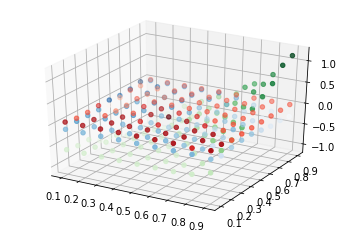

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, mzAK, c=mzAK, cmap='Greens');

ax.scatter3D(xx, yy, mzAO, c=mzAO, cmap='Reds');

ax.scatter3D(xx, yy, mzKO, c=mzKO, cmap='Blues');
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\delta$')
ax.set_title('$\mu_{\phi_{AO}}$', fontsize=15)
#ax.scatter3D(xx, yy, mzKO, c=mzKO, cmap='Blues');

Text(0.5, 0.92, '$\\mu_{\\phi_{AK}}$')

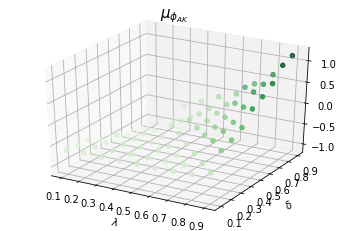

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, mzAK, c=mzAK, cmap='Greens');
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\delta$')
ax.set_title('$\mu_{\phi_{AK}}$', fontsize=15)

Text(0.5, 0.92, '$\\mu_{\\phi_{AO}}$')

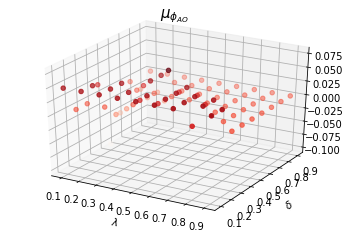

In [ ]:
ax = plt.axes(projection='3d')
#ax.scatter3D(xx, yy, mzAK, c=mzAK, cmap='Greens');
ax.scatter3D(xx, yy, mzAO, c=mzAO, cmap='Reds');
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\delta$')
ax.set_title('$\mu_{\phi_{AO}}$', fontsize=15)
#ax.scatter3D(xx, yy, mzKO, c=mzKO, cmap='Blues');

Text(0.5, 0.92, '$\\mu_{\\phi_{KO}}$')

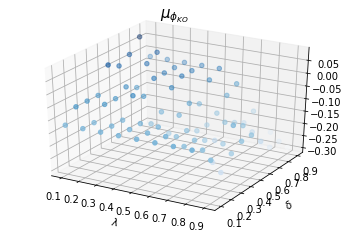

In [ ]:
ax = plt.axes(projection='3d')
#ax.scatter3D(xx, yy, mzAK, c=mzAK, cmap='Greens');
#ax.scatter3D(xx, yy, mzAO, c=mzAO, cmap='Reds');
ax.scatter3D(xx, yy, mzKO, c=mzKO, cmap='Blues');
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\delta$')
ax.set_title('$\mu_{\phi_{KO}}$', fontsize=15)



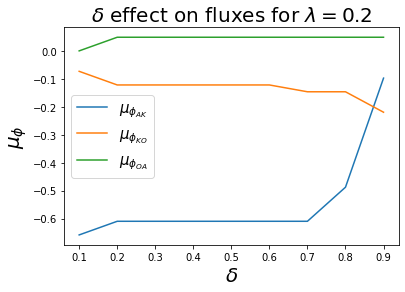

In [ ]:

plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],m)
plt.title('$\delta$ effect on fluxes for $\lambda = 0.2$',fontsize=20)
plt.xlabel('$\delta$',fontsize=20)
plt.ylabel('$\mu_{\phi}$',fontsize=20)
plt.legend(["$\mu_{\phi_{A K}}$","$\mu_{\phi_{K O}}$","$\mu_{\phi_{O A}}$"], fontsize = 15)
plt.show()

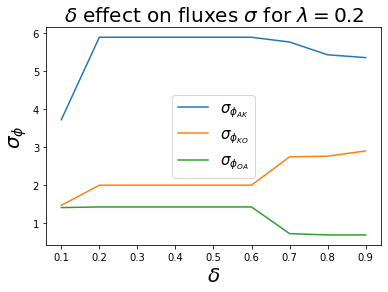

In [ ]:
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],s)
plt.title('$\delta$ effect on fluxes $\sigma$ for $\lambda = 0.2$',fontsize=20)
plt.xlabel('$\delta$',fontsize=20)
plt.ylabel('$\sigma_{\phi}$',fontsize=20)
plt.legend(["$\sigma_{\phi_{A K}}$","$\sigma_{\phi_{K O}}$","$\sigma_{\phi_{O A}}$"], fontsize = 15)
plt.show()

In [ ]:
ml , sl = study_l(df,0.6,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],300) 

debug
debug
debug
debug
debug
debug
debug
debug
debug


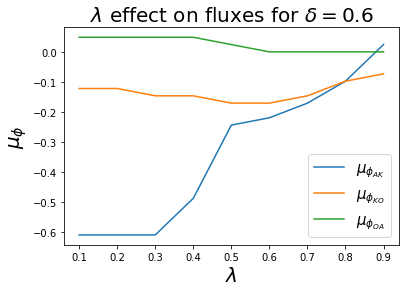

In [ ]:
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],ml)
plt.title('$\lambda$ effect on fluxes for $\delta = 0.6$',fontsize=20)
plt.xlabel('$\lambda$',fontsize=20)
plt.ylabel('$\mu_{\phi}$',fontsize=20)
plt.legend(["$\mu_{\phi_{A K}}$","$\mu_{\phi_{K O}}$","$\mu_{\phi_{O A}}$"], fontsize = 15)
plt.show()

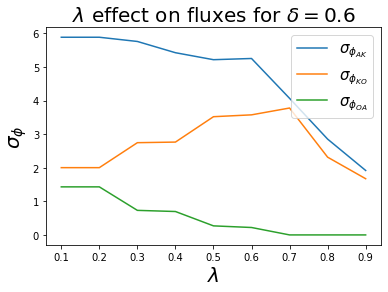

In [ ]:
plt.plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],sl)
plt.title('$\lambda$ effect on fluxes for $\delta = 0.6$',fontsize=20)
plt.xlabel('$\lambda$',fontsize=20)
plt.ylabel('$\sigma_{\phi}$',fontsize=20)
plt.legend(["$\sigma_{\phi_{A K}}$","$\sigma_{\phi_{K O}}$","$\sigma_{\phi_{O A}}$"], fontsize = 15)
plt.show()

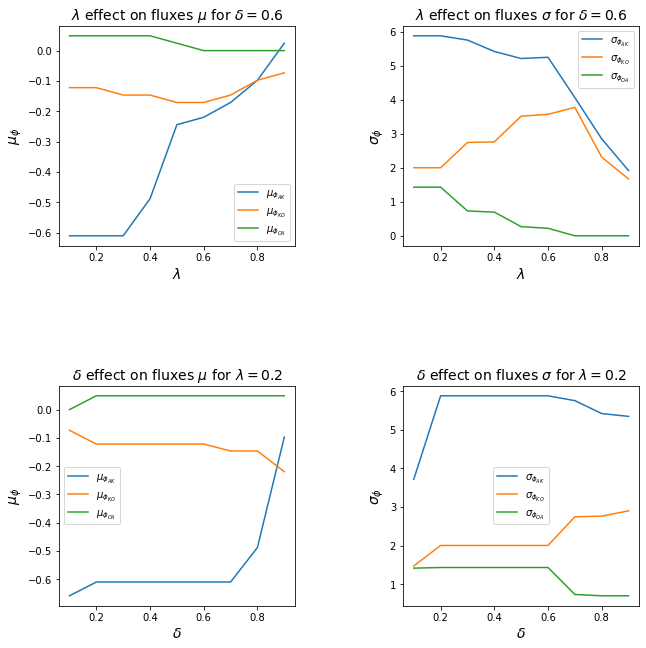

In [ ]:



fig, axs = plt.subplots(2, 2)
axs[0, 0].plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],ml)
axs[0, 0].set_title('$\lambda$ effect on fluxes $\mu$ for $\delta = 0.6$',fontsize=14)
axs[0, 0].set_xlabel('$\lambda$',fontsize=14)
axs[0, 0].set_ylabel('$\mu_{\phi}$',fontsize=14)
axs[0, 0].legend(["$\mu_{\phi_{A K}}$","$\mu_{\phi_{K O}}$","$\mu_{\phi_{O A}}$"])#, fontsize = 15)

###
axs[0, 1].plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],sl)
axs[0, 1].set_title('$\lambda$ effect on fluxes $\sigma$ for $\delta = 0.6$',fontsize=14)
axs[0, 1].set_xlabel('$\lambda$',fontsize=14)
axs[0, 1].set_ylabel('$\sigma_{\phi}$',fontsize=14)
axs[0, 1].legend(["$\sigma_{\phi_{A K}}$","$\sigma_{\phi_{K O}}$","$\sigma_{\phi_{O A}}$"])#, fontsize = 15)

###
axs[1, 0].plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],m)
axs[1, 0].set_title('$\delta$ effect on fluxes $\mu$ for $\lambda = 0.2$',fontsize=14)
axs[1, 0].set_xlabel('$\delta$',fontsize=14)
axs[1, 0].set_ylabel('$\mu_{\phi}$',fontsize=14)
axs[1, 0].legend(["$\mu_{\phi_{A K}}$","$\mu_{\phi_{K O}}$","$\mu_{\phi_{O A}}$"])#, fontsize = 15)

####
axs[1, 1].plot([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],s)
axs[1, 1].set_title('$\delta$ effect on fluxes $\sigma$ for $\lambda = 0.2$',fontsize=14)
axs[1, 1].set_xlabel('$\delta$',fontsize=14)
axs[1, 1].set_ylabel('$\sigma_{\phi}$',fontsize=14)
axs[1, 1].legend(["$\sigma_{\phi_{A K}}$","$\sigma_{\phi_{K O}}$","$\sigma_{\phi_{O A}}$"])#, fontsize = 15)


fig.tight_layout(pad= 0.1)
fig.set_figheight(10)
fig.set_figwidth(10)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

In [ ]:
a=np.transpose([Plista[3][np.where(Plista[3]-Plista[4][0:len(Plista[3])] != 0)]
,Plista[4][np.where(Plista[3]-Plista[4][0:len(Plista[3])] != 0)]])
for i in a:
    print(i[0])

0.0
0.0
0.0
1.0
1.0
0.0


In [ ]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

Text(0, 0.5, '120')

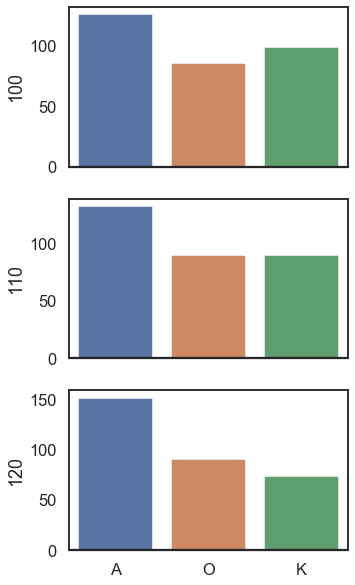

In [ ]:
i=100
j=110
k=120


Ai = np.where(Plista[i]==1)
Oi = np.where(Plista[i]==-1)
Ki = np.where(Plista[i]==0)

Aj = np.where(Plista[j]==1)
Oj = np.where(Plista[j]==-1)
Kj = np.where(Plista[j]==0)

Ak = np.where(Plista[k]==1)
Ok = np.where(Plista[k]==-1)
Kk = np.where(Plista[k]==0)

#)
#print()
#print()
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 10), sharex=True)

x = np.array(list("AOK"))

y1 = np.array([len(Ai[0]),len(Oi[0]),len(Ki[0])])

sns.barplot(x=x, y=y1, palette="deep", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel(str(i))

y2 = np.array([len(Aj[0]),len(Oj[0]),len(Kj[0])])

sns.barplot(x=x, y=y2, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel(str(j))


y3 = np.array([len(Ak[0]),len(Ok[0]),len(Kk[0])])

sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel(str(k))

In [ ]:
def create_visualization(Plista,t):
    mapa = np.zeros((18,18))
    
    k=0
    j=0
    for i in Plista[t]:
        
        if(k%18 ==0 and k!=0):
            k=0
            j+=1
        if i==0:
            mapa[k][j]=0.5
        else:
            mapa[k][j]=i
        k+=1
    
    return mapa

In [ ]:
mapa = create_visualization(Plista,110);

#animacoes e representacoes da dinamica

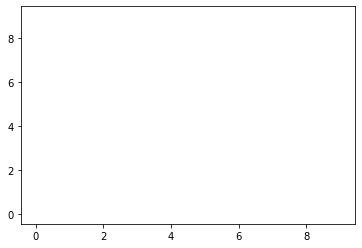

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for i in range(10):
    plt.plot([i] * 10)
    camera.snap()
animation = camera.animate()
animation.save('test.gif', writer = 'pillow')

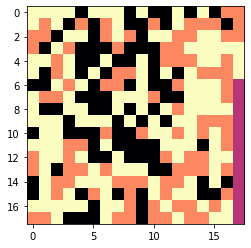

In [ ]:
for i in range(5,120,5):
    #plt.imshow(np.sort( create_visualization(Plista,i)))
    plt.imshow( create_visualization(Plista,i), cmap = 'magma')
    plt.savefig('partisanloc' + str(i)+'.png')

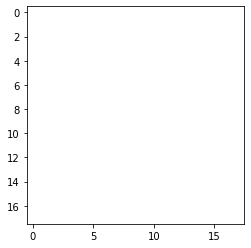

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for i in range(5,120,5):
    #plt.imshow(np.sort( create_visualization(Plista,i)))
    plt.imshow( create_visualization(Plista,i), cmap = 'magma')
    camera.snap()
animation = camera.animate()
animation.save('modeldynamic.gif', writer = 'pillow')

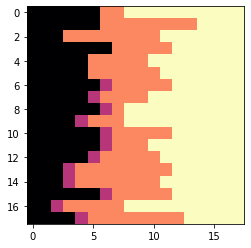

In [ ]:
for i in range(5,120,5):
    plt.imshow(np.sort( create_visualization(Plista,i)), cmap = 'magma')
    #plt.imshow( create_visualization(Plista,i))
    plt.savefig('partisan' + str(i)+'.png')

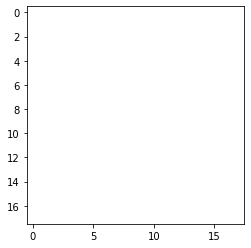

In [ ]:
fig = plt.figure()
camera = Camera(fig)
for i in range(5,120,5):
    #plt.imshow(np.sort( create_visualization(Plista,i)))
    plt.imshow( np.sort(create_visualization(Plista,i)), cmap = 'magma')
    camera.snap()
animation = camera.animate()
animation.save('sortedmodeldynamic.gif', writer = 'pillow')

In [ ]:
import os
print( os.getcwd() )
print( os.listdir() )

/content
['.config', 'modeldynamic.gif', 'data.csv', 'sortedmodeldynamic.gif', 'test.gif', 'sample_data']


In [ ]:
from google.colab import files
files.download( "sortedmodeldynamic.gif" )    

In [ ]:
#Plista#

In [ ]:
tempo = da.time[1::100]

In [ ]:
len(tempo)

122